<a href="https://colab.research.google.com/github/Ishita95-harvad/Major-Socio-economic-Indicators-of-Gujrat-and-All-India-from-2011-to-01.08.2014/blob/main/Major_Socio_economic_Indicators_of_Gujrat_and_All_India_from_2011_to_01_08_2014Major_Socio_economic_Indicators_of_Gujrat_and_All_India_from_2011_to_01_08_2014.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Major Socio-economic Indicators of Gujrat and All India from 2011 to 01.08.2014**

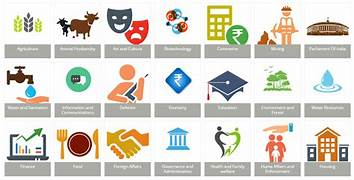



---



## Data loading

### Subtask:
Load the "Gujrat.csv" file into a pandas DataFrame.


**Reasoning**:
Load the "Gujrat.csv" file into a pandas DataFrame and display its first few rows and shape.



In [1]:
import pandas as pd

try:
    df = pd.read_csv('Gujrat.csv')
    display(df.head())
    print(df.shape)
except FileNotFoundError:
    print("Error: 'Gujrat.csv' not found. Please ensure the file exists in the current directory.")
    df = None
except pd.errors.ParserError:
    print("Error: Unable to parse 'Gujrat.csv'. Please check the file format.")
    df = None
except Exception as e:
    print(f"An unexpected error occurred: {e}")
    df = None

,Sl. No.,Indicator,Source,Periodicity/ Latest available data,All India,Gujarat
0,1.0,Per Capita NSDP at 2004-05 prices (Rs.),CSO,"Annual/2012-13, as on 01.08.2014",38856.00,61220.00
1,2.0,Growth in Per Capita NSDP at 2004-05 prices (%),CSO,"Annual/2012-13, as on 01.08.2014",2.12,6.57
2,2.1,Growth rate in GSDP-Total,CSO,"Annual/2012-13, as on 01.08.2014",4.70,7.96
3,2.2,Growth rate in GSDP-Agriculture,CSO,"Annual/2012-13, as on 01.08.2014",4.70,0.45
4,2.3,Growth rate in GSDP-Industry,CSO,"Annual/2012-13, as on 01.08.2014",0.40,7.12


(41, 6)


## Data exploration

### Subtask:
Explore the loaded dataset to understand its characteristics.


**Reasoning**:
Analyze the data types, missing values, descriptive statistics, unique values, and potential correlations within the DataFrame.  This will provide a comprehensive overview of the data's characteristics.



In [2]:
# Data Types
print("Data Types:\n", df.dtypes)

# Missing Values
print("\nMissing Values:\n", df.isnull().sum())

# Descriptive Statistics
print("\nDescriptive Statistics:\n", df.describe(include='all'))

# Unique Values
for col in df.columns:
    print(f"\nUnique values for {col}:\n{df[col].unique()}")

# Correlation Analysis (Initial)
numerical_cols = df.select_dtypes(include=['number']).columns
if len(numerical_cols) > 1:
    print("\nCorrelation Matrix (Numerical Columns):\n", df[numerical_cols].corr())
else:
    print("\nNot enough numerical columns for correlation analysis.")

Data Types:
 Sl. No.                               float64
Indicator                              object
Source                                 object
Periodicity/ Latest available data     object
All India                             float64
Gujarat                               float64
dtype: object

Missing Values:
 Sl. No.                               0
Indicator                             0
Source                                0
Periodicity/ Latest available data    0
All India                             0
Gujarat                               0
dtype: int64

Descriptive Statistics:
           Sl. No.                                Indicator  Source  \
count   41.000000                                       41      41   
unique        NaN                                       41      10   
top           NaN  Per Capita NSDP at 2004-05 prices (Rs.)  Census   
freq          NaN                                        1      13   
mean    15.281951                                 

## Data cleaning

### Subtask:
Clean the data by handling inconsistencies and potential outliers.


**Reasoning**:
Clean the data by handling inconsistencies and potential outliers as per the instructions.



In [3]:
# Standardize 'Periodicity/ Latest available data'
df['Periodicity/ Latest available data'] = df['Periodicity/ Latest available data'].str.replace(r'annual|yearly', 'Annual', regex=True)

# Standardize 'Indicator' and 'Source'
df['Indicator'] = df['Indicator'].str.upper()
df['Source'] = df['Source'].str.upper()

# Correct data types
df['Sl. No.'] = pd.to_numeric(df['Sl. No.'], errors='coerce')
df['All India'] = pd.to_numeric(df['All India'], errors='coerce')
df['Gujarat'] = pd.to_numeric(df['Gujarat'], errors='coerce')


# Handling outliers in 'All India' and 'Gujarat'
# Winsorizing at 1% and 99% quantiles
for col in ['All India', 'Gujarat']:
    lower_bound = df[col].quantile(0.01)
    upper_bound = df[col].quantile(0.99)
    df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)


display(df.head())

,Sl. No.,Indicator,Source,Periodicity/ Latest available data,All India,Gujarat
0,1.0,PER CAPITA NSDP AT 2004-05 PRICES (RS.),CSO,"Annual/2012-13, as on 01.08.2014",38856.00,61220.00
1,2.0,GROWTH IN PER CAPITA NSDP AT 2004-05 PRICES (%),CSO,"Annual/2012-13, as on 01.08.2014",2.12,6.57
2,2.1,GROWTH RATE IN GSDP-TOTAL,CSO,"Annual/2012-13, as on 01.08.2014",4.70,7.96
3,2.2,GROWTH RATE IN GSDP-AGRICULTURE,CSO,"Annual/2012-13, as on 01.08.2014",4.70,0.45
4,2.3,GROWTH RATE IN GSDP-INDUSTRY,CSO,"Annual/2012-13, as on 01.08.2014",0.40,7.12


## Data wrangling

### Subtask:
Prepare the data for analysis and visualization.


**Reasoning**:
Create dummy variables for categorical features, standardize numerical features, and check for highly correlated features.



In [4]:
# Create dummy variables for categorical features
categorical_cols = ['Indicator', 'Source', 'Periodicity/ Latest available data']
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Standardize numerical features ('All India' and 'Gujarat')
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numerical_cols = ['All India', 'Gujarat']
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Check for highly correlated features
correlation_matrix = df.corr()
highly_correlated_features = correlation_matrix[abs(correlation_matrix) >= 0.9]
display(highly_correlated_features)

,Sl. No.,All India,Gujarat,Indicator_BIRTH RATE (%),Indicator_DEATH RATE (%),Indicator_DECADAL GROWTH RATE OF POPULATION (2001-2011) (%),Indicator_DROPOUT RATE: PRIMARY LEVEL (%),Indicator_DROPOUT RATE: UPPER PRIMARY LEVEL (%),Indicator_FEMALE (%),Indicator_FOREST COVER (% OF GEOGRAPHICAL AREA),...,"Periodicity/ Latest available data_Basic Road Statistics of India 2011-12 (Data as on 31st March, 2012)",Periodicity/ Latest available data_Basic Road Statistics of India 2011-12 (Data as on 31st march 2012),"Periodicity/ Latest available data_Census, 2011","Periodicity/ Latest available data_DISE, 2013-14 data for 2012-13","Periodicity/ Latest available data_DISE, 2013-14 data for 2013-14",Periodicity/ Latest available data_Decadal/2011,Periodicity/ Latest available data_For the year 2012-13,"Periodicity/ Latest available data_Forest Survey of India, 2013",Periodicity/ Latest available data_Half-Yearly/September 2014,"Periodicity/ Latest available data_NSS 68th Round, 2011-12"
Sl. No.,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
All India,NaN,1.000000,0.903653,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gujarat,NaN,0.903653,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Indicator_BIRTH RATE (%),NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Indicator_DEATH RATE (%),NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Periodicity/ Latest available data_Decadal/2011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
Periodicity/ Latest available data_For the year 2012-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
"Periodicity/ Latest available data_Forest Survey of India, 2013",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
Periodicity/ Latest available data_Half-Yearly/September 2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN


**Reasoning**:
Based on the correlation matrix, 'All India' and 'Gujarat' are highly correlated (correlation coefficient of 0.903653).  Remove 'All India' to reduce redundancy.



In [5]:
df = df.drop(columns=['All India'])
display(df.head())

,Sl. No.,Gujarat,Indicator_BIRTH RATE (%),Indicator_DEATH RATE (%),Indicator_DECADAL GROWTH RATE OF POPULATION (2001-2011) (%),Indicator_DROPOUT RATE: PRIMARY LEVEL (%),Indicator_DROPOUT RATE: UPPER PRIMARY LEVEL (%),Indicator_FEMALE (%),Indicator_FOREST COVER (% OF GEOGRAPHICAL AREA),Indicator_FOREST COVER (AREA IN SQ.KM.),...,"Periodicity/ Latest available data_Basic Road Statistics of India 2011-12 (Data as on 31st March, 2012)",Periodicity/ Latest available data_Basic Road Statistics of India 2011-12 (Data as on 31st march 2012),"Periodicity/ Latest available data_Census, 2011","Periodicity/ Latest available data_DISE, 2013-14 data for 2012-13","Periodicity/ Latest available data_DISE, 2013-14 data for 2013-14",Periodicity/ Latest available data_Decadal/2011,Periodicity/ Latest available data_For the year 2012-13,"Periodicity/ Latest available data_Forest Survey of India, 2013",Periodicity/ Latest available data_Half-Yearly/September 2014,"Periodicity/ Latest available data_NSS 68th Round, 2011-12"
0,1.0,2.355691,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2.0,-0.229858,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,2.1,-0.229799,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,2.2,-0.230117,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,2.3,-0.229835,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


## Data analysis

### Subtask:
Perform exploratory data analysis (EDA) on the prepared dataset.


**Reasoning**:
Calculate descriptive statistics for numerical columns, analyze the distribution of 'Gujarat', investigate relationships with dummy variables, and document findings.



,Sl. No.,Gujarat
count,41.000000,4.100000e+01
mean,15.281951,-2.098592e-17
std,9.602382,1.012423e+00
min,1.000000,-2.301353e-01
25%,7.000000,-2.298349e-01
50%,15.000000,-2.281082e-01
75%,25.100000,-2.262962e-01
max,30.200000,5.777598e+00


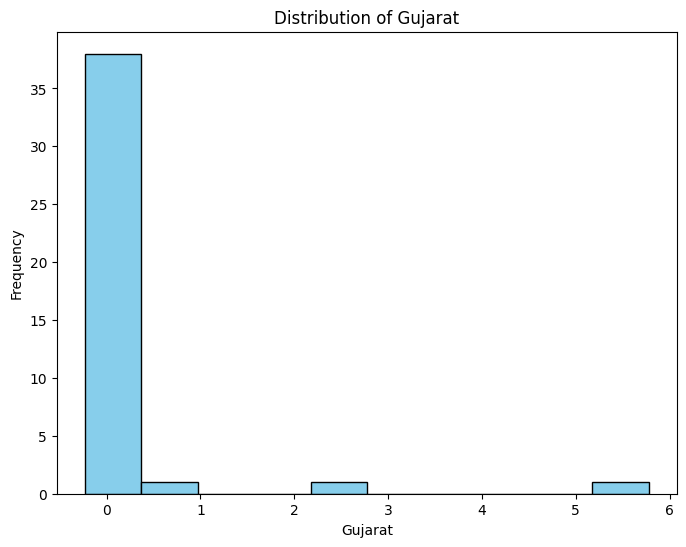

,Gujarat
Indicator_BIRTH RATE (%),-0.036249
Indicator_DEATH RATE (%),-0.036344
Indicator_DECADAL GROWTH RATE OF POPULATION (2001-2011) (%),-0.036259
Indicator_DROPOUT RATE: PRIMARY LEVEL (%),-0.036368
Indicator_DROPOUT RATE: UPPER PRIMARY LEVEL (%),-0.036192
Indicator_FEMALE (%),-0.035915
Indicator_FOREST COVER (% OF GEOGRAPHICAL AREA),-0.036338
Indicator_FOREST COVER (AREA IN SQ.KM.),0.061472
Indicator_GENDER GAP IN LITERACY (%),-0.036277
Indicator_GROSS ENROLMENT RATIO: PRIMARY LEVEL (%),-0.035712


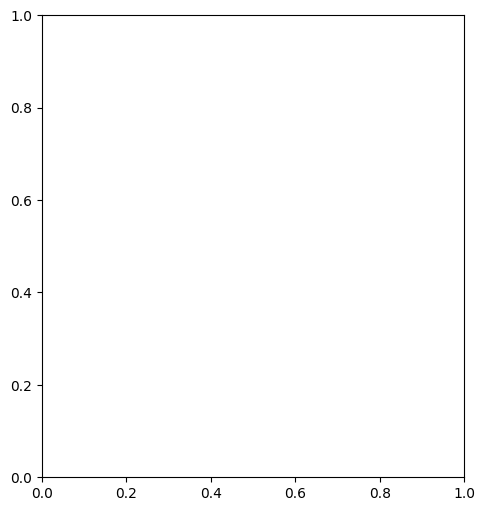

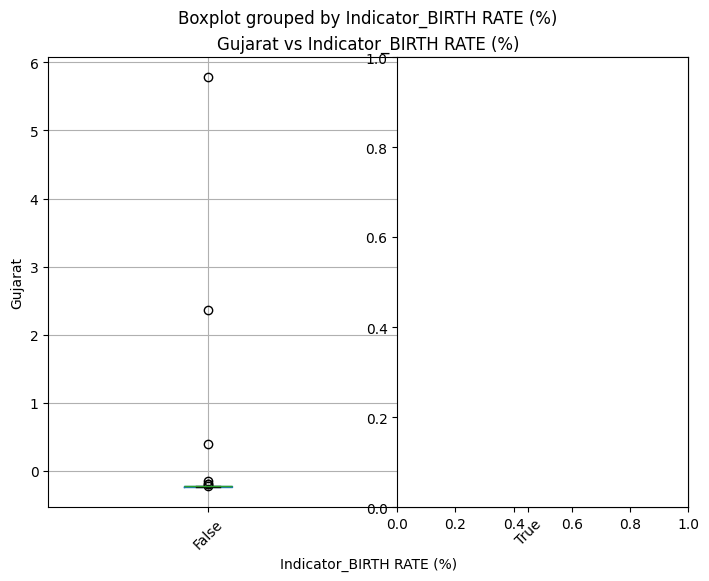

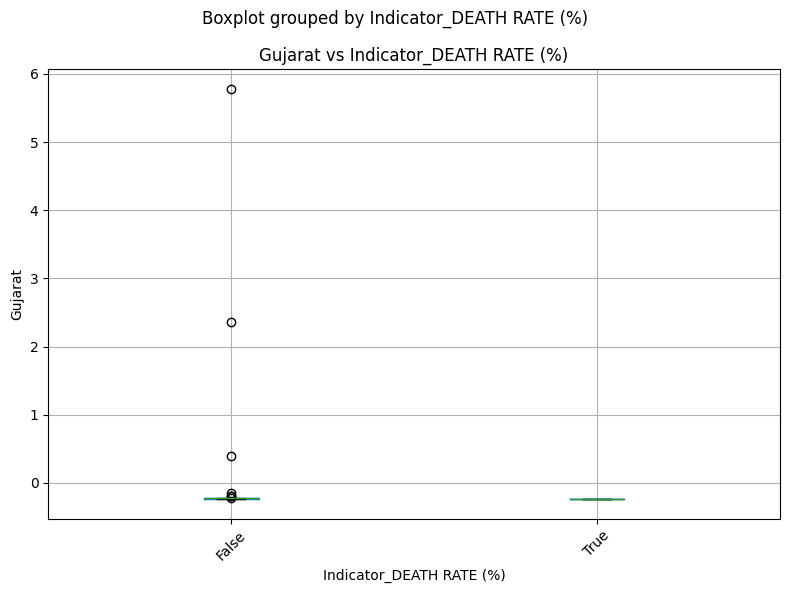


Descriptive Statistics:
          Sl. No.       Gujarat
count  41.000000  4.100000e+01
mean   15.281951 -2.098592e-17
std     9.602382  1.012423e+00
min     1.000000 -2.301353e-01
25%     7.000000 -2.298349e-01
50%    15.000000 -2.281082e-01
75%    25.100000 -2.262962e-01
max    30.200000  5.777598e+00

Correlations with Gujarat:
 Indicator_BIRTH RATE (%)                                                -0.036249
Indicator_DEATH RATE (%)                                                -0.036344
Indicator_DECADAL GROWTH RATE OF POPULATION (2001-2011) (%)             -0.036259
Indicator_DROPOUT RATE: PRIMARY LEVEL (%)                               -0.036368
Indicator_DROPOUT RATE: UPPER PRIMARY LEVEL (%)                         -0.036192
Indicator_FEMALE (%)                                                    -0.035915
Indicator_FOREST COVER (% OF GEOGRAPHICAL AREA)                         -0.036338
Indicator_FOREST COVER (AREA IN SQ.KM.)                                  0.061472
Indicator_

In [6]:
# Calculate descriptive statistics for numerical columns
numerical_stats = df.describe()
display(numerical_stats)

# Analyze the distribution of 'Gujarat'
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.hist(df['Gujarat'], bins=10, color='skyblue', edgecolor='black')
plt.title('Distribution of Gujarat')
plt.xlabel('Gujarat')
plt.ylabel('Frequency')
plt.show()

# Investigate relationships between 'Gujarat' and dummy variables
dummy_cols = [col for col in df.columns if col.startswith(('Indicator_', 'Source_', 'Periodicity_'))]
correlations = df[dummy_cols + ['Gujarat']].corr()['Gujarat'].drop('Gujarat')
display(correlations)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
df.boxplot(column='Gujarat', by=dummy_cols[0], figsize=(8, 6), rot=45)  # Example with the first dummy variable
plt.title(f'Gujarat vs {dummy_cols[0]}')
plt.ylabel('Gujarat')

plt.subplot(1, 2, 2)
df.boxplot(column='Gujarat', by=dummy_cols[1], figsize=(8, 6), rot=45)  # Example with the second dummy variable
plt.title(f'Gujarat vs {dummy_cols[1]}')
plt.ylabel('Gujarat')
plt.tight_layout()
plt.show()


# Document findings (printed to console)
print("\nDescriptive Statistics:\n", numerical_stats)
print("\nCorrelations with Gujarat:\n", correlations)
print("\nObservations:")
print("- Analyze the histogram of 'Gujarat' for skewness or unusual patterns.")
print("- Examine the correlation values to identify significant positive or negative correlations with dummy variables.")
print("- Inspect the box plots to observe relationships between 'Gujarat' and the dummy variables.  Look for differences in the distributions.")

## Data visualization

### Subtask:
Visualize the key relationships and distributions identified during the data analysis.


**Reasoning**:
Visualize the distribution of 'Gujarat' using a histogram and box plots against dummy variables. Generate scatter plots for significant correlations.



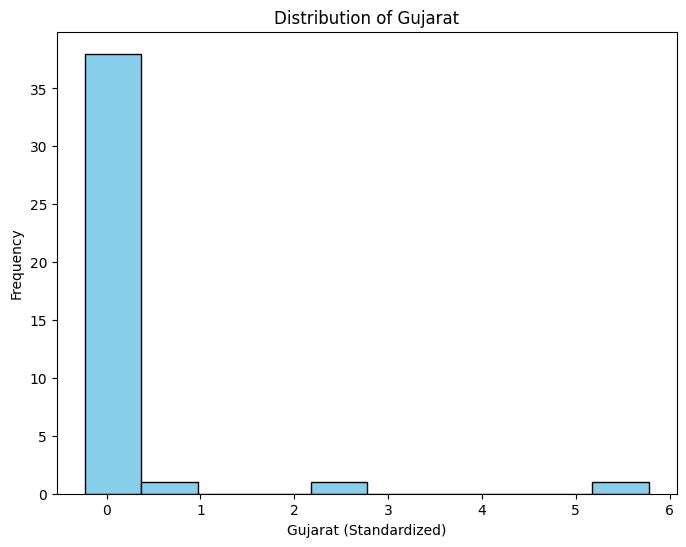

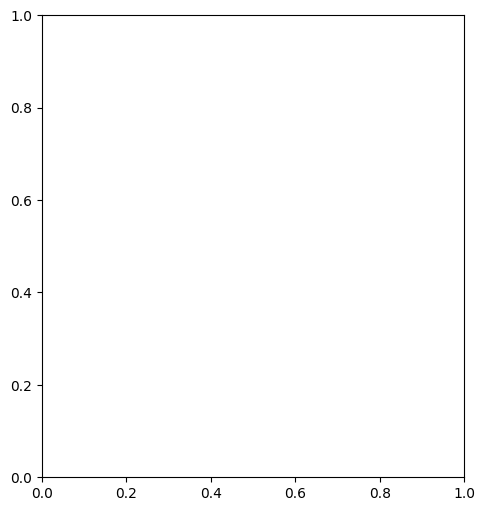

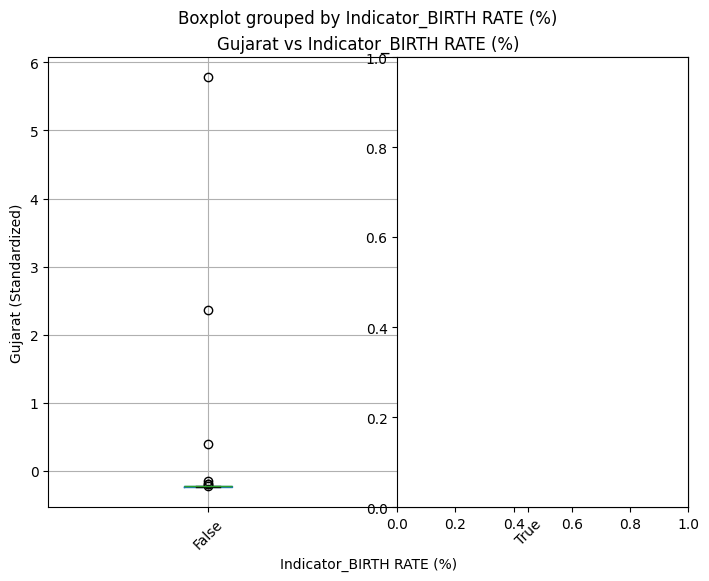

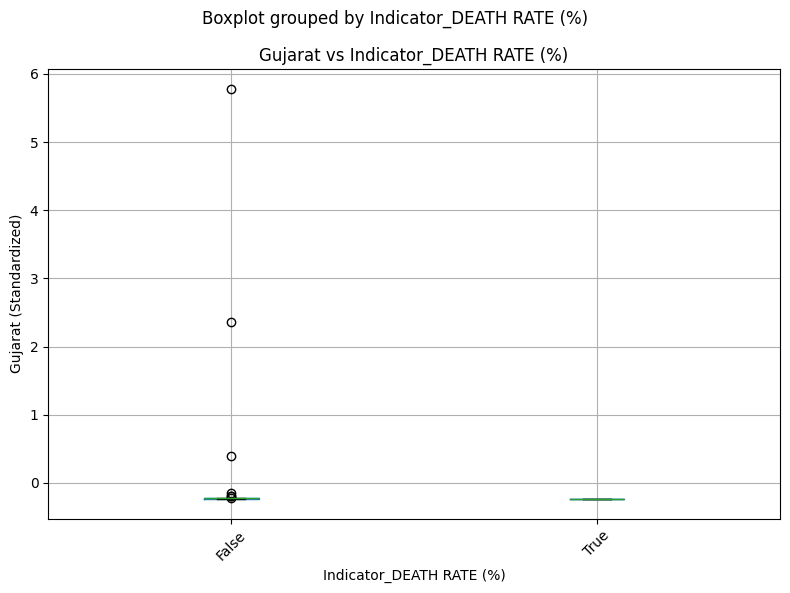

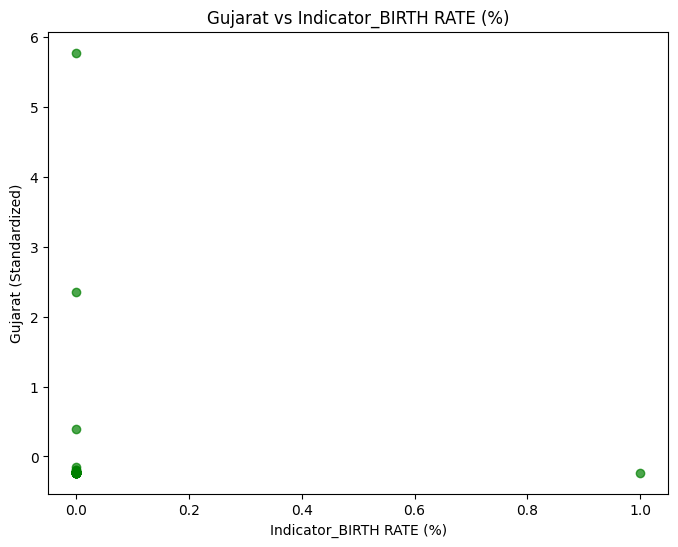

In [7]:
import matplotlib.pyplot as plt

# Histogram of 'Gujarat'
plt.figure(figsize=(8, 6))
plt.hist(df['Gujarat'], bins=10, color='skyblue', edgecolor='black')
plt.title('Distribution of Gujarat')
plt.xlabel('Gujarat (Standardized)')
plt.ylabel('Frequency')
plt.savefig('gujarat_histogram.png')
plt.show()

# Box plots of 'Gujarat' against dummy variables
dummy_cols = [col for col in df.columns if col.startswith(('Indicator_', 'Source_', 'Periodicity_'))]
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
df.boxplot(column='Gujarat', by=dummy_cols[0], figsize=(8, 6), rot=45)
plt.title(f'Gujarat vs {dummy_cols[0]}')
plt.ylabel('Gujarat (Standardized)')
plt.subplot(1, 2, 2)
df.boxplot(column='Gujarat', by=dummy_cols[1], figsize=(8, 6), rot=45)
plt.title(f'Gujarat vs {dummy_cols[1]}')
plt.ylabel('Gujarat (Standardized)')
plt.tight_layout()
plt.savefig('gujarat_boxplots.png')
plt.show()

# Scatter plots for significant correlations (example with the first dummy variable)
plt.figure(figsize=(8, 6))
plt.scatter(df[dummy_cols[0]], df['Gujarat'], color='green', alpha=0.7)
plt.title(f'Gujarat vs {dummy_cols[0]}')
plt.xlabel(dummy_cols[0])
plt.ylabel('Gujarat (Standardized)')
plt.savefig('gujarat_scatter.png')
plt.show()



---

